In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_armaan.csv", parse_dates=["date"]).sort_values("date").reset_index(drop=True)


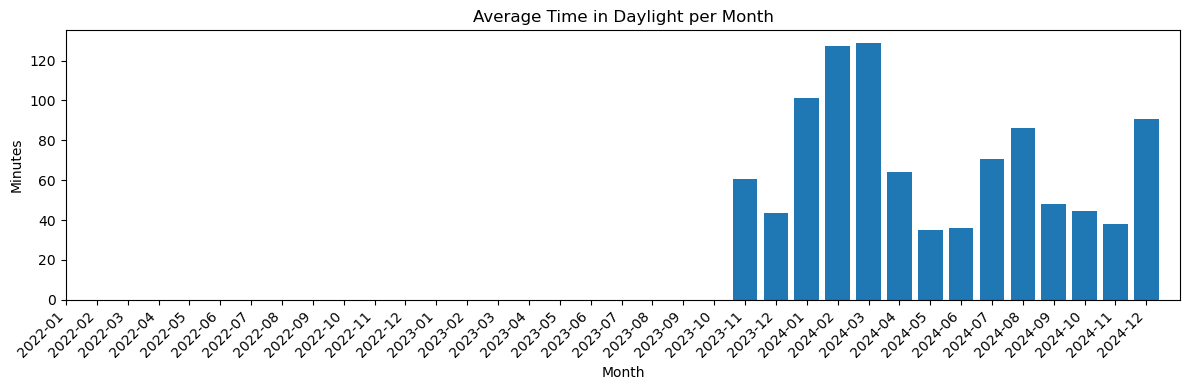

,year,month,TimeInDaylight
0,2022,1,NaN
1,2022,2,NaN
2,2022,3,NaN
3,2022,4,NaN
4,2022,5,NaN
5,2022,6,NaN
6,2022,7,NaN
7,2022,8,NaN
8,2022,9,NaN
9,2022,10,NaN


In [4]:
monthly_daylight = (
    df.groupby(["year","month"])["TimeInDaylight"]
      .mean()
      .reset_index()
      .sort_values(["year","month"])
)

plt.figure(figsize=(12,4))
plt.bar(monthly_daylight.index, monthly_daylight["TimeInDaylight"])
plt.xticks(
    ticks=monthly_daylight.index,
    labels=[f"{y}-{m:02d}" for y,m in zip(monthly_daylight["year"], monthly_daylight["month"])],
    rotation=45, ha="right"
)
plt.title("Average Time in Daylight per Month")
plt.xlabel("Month"); plt.ylabel("Minutes")
plt.tight_layout(); plt.show()

monthly_daylight


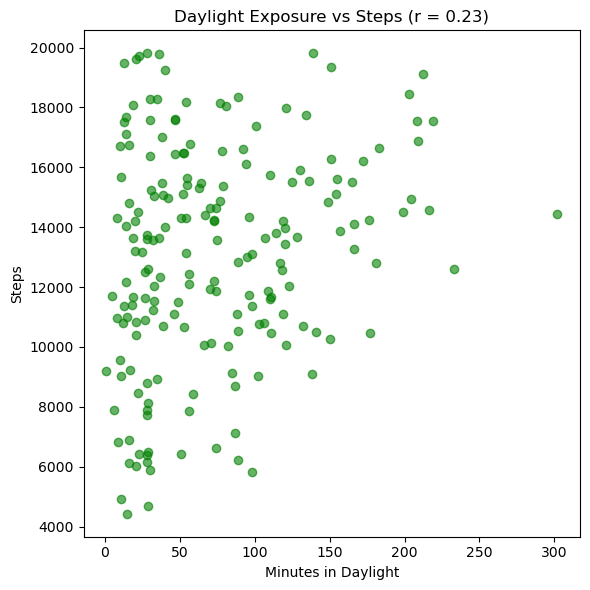

In [10]:
mask = df["TimeInDaylight"].notna() & df["StepCount"].notna()
r = df.loc[mask, ["TimeInDaylight","StepCount"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"TimeInDaylight"], df.loc[mask,"StepCount"], alpha=0.6, color="green")
plt.title(f"Daylight Exposure vs Steps (r = {r:.2f})")
plt.xlabel("Minutes in Daylight"); plt.ylabel("Steps")
plt.tight_layout(); plt.show()


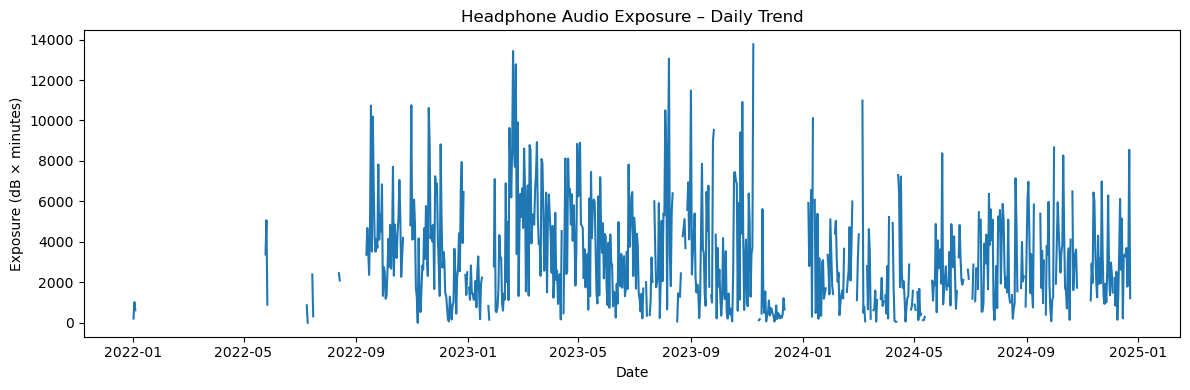

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["HeadphoneAudioExposure"])
plt.title("Headphone Audio Exposure – Daily Trend")
plt.xlabel("Date"); plt.ylabel("Exposure (dB × minutes)")
plt.tight_layout(); plt.show()


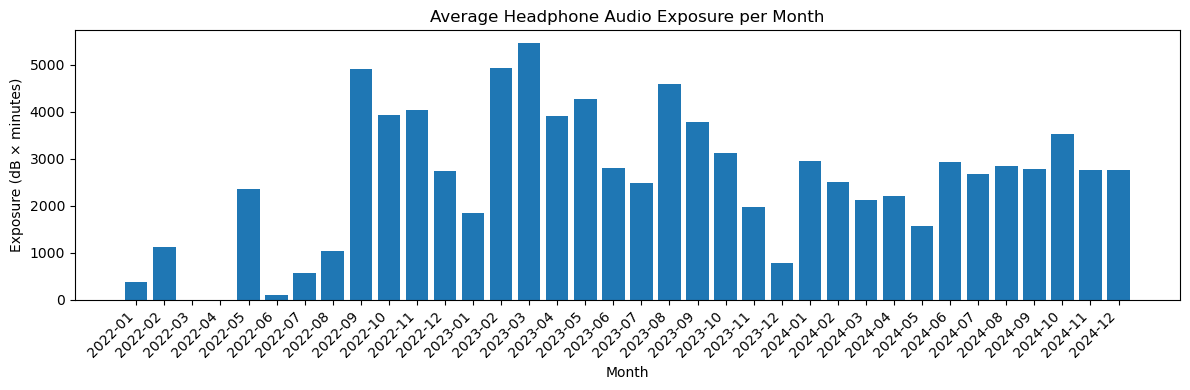

,year,month,HeadphoneAudioExposure
0,2022,1,376.052037
1,2022,2,1113.484400
2,2022,3,NaN
3,2022,4,NaN
4,2022,5,2356.535175


In [7]:
monthly_audio = (
    df.groupby(["year","month"])["HeadphoneAudioExposure"]
      .mean()
      .reset_index()
      .sort_values(["year","month"])
)

plt.figure(figsize=(12,4))
plt.bar(monthly_audio.index, monthly_audio["HeadphoneAudioExposure"])
plt.xticks(
    ticks=monthly_audio.index,
    labels=[f"{y}-{m:02d}" for y,m in zip(monthly_audio["year"], monthly_audio["month"])],
    rotation=45, ha="right"
)
plt.title("Average Headphone Audio Exposure per Month")
plt.xlabel("Month"); plt.ylabel("Exposure (dB × minutes)")
plt.tight_layout(); plt.show()

monthly_audio.head()


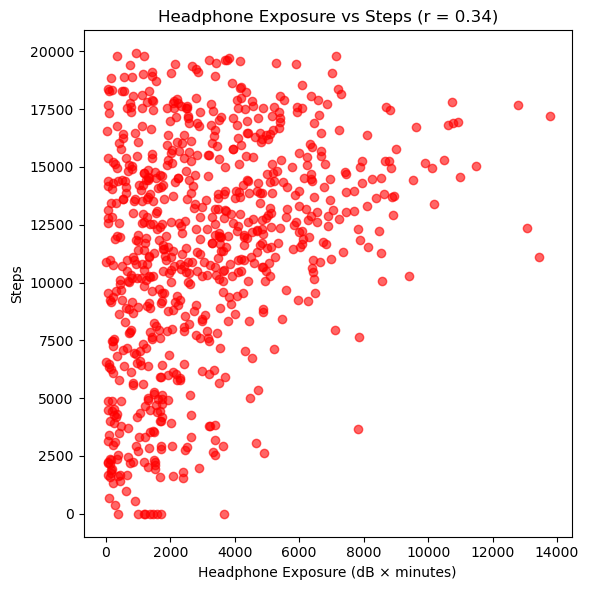

In [9]:
mask = df["HeadphoneAudioExposure"].notna() & df["StepCount"].notna()
r = df.loc[mask, ["HeadphoneAudioExposure","StepCount"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"HeadphoneAudioExposure"], df.loc[mask,"StepCount"], alpha=0.6, color="r")
plt.title(f"Headphone Exposure vs Steps (r = {r:.2f})")
plt.xlabel("Headphone Exposure (dB × minutes)"); plt.ylabel("Steps")
plt.tight_layout(); plt.show()
